<a href="https://colab.research.google.com/github/Aritra153/Building-my-Neural-Network-from-Scratch/blob/main/Building_my_own_Neural_network_from_scratch_stage_1_development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

I have defined a function for initializing weights and biases

In [2]:
def init_weights(input_arr,Layer_dict,n_layers):
  # input_arr : A 2-D array of shape(factors,no.of training examples)
  # m = no. of training examples, factors = no. of input factors(in each training example)
  factors=input_arr.shape[0]
  weights_dict={}
  bias_dict={}
  weights_dict["W"+str(1)]=absol(np.random.randn(Layer_dict['L1'],factors)*0.01)
  bias_dict["b"+str(1)]=np.zeros((Layer_dict['L1'],1))
  for i in range(2,(n_layers+1)):
    weights_dict["W"+str(i)]=absol(np.random.randn(Layer_dict["L"+str(i)],Layer_dict["L"+str(i-1)] ) * 0.01)
    bias_dict["b"+str(i)]=np.zeros((Layer_dict["L"+str(i)],1))
  weights_dict["W"+str(n_layers+1)]=absol(np.random.randn(1,Layer_dict["L"+str(n_layers)])*0.01)
  bias_dict["b"+str(n_layers+1)]=np.zeros((1,1))

  return weights_dict,bias_dict



In [8]:
in_ar=np.random.randn(5,1)   #Testing cell
Layer_dict={"L1":5,"L2":4,"L3":4,"L4":3}
wgts,bia=init_weights(in_ar,Layer_dict,4)

In [9]:
wgts["W2"]  #Testing cell

array([[0.01221876, 0.01003865, 0.00149121, 0.01015369, 0.00747902],
       [0.01656529, 0.00887747, 0.00275115, 0.00624573, 0.0026134 ],
       [0.0098266 , 0.0158884 , 0.01005424, 0.00462305, 0.0010351 ],
       [0.00884502, 0.00845244, 0.0100911 , 0.01437613, 0.00043633]])

In [10]:
bia["b2"]  #Testing cell

array([[0.],
       [0.],
       [0.],
       [0.]])

In the cell below, I have defined a function for forward propagation.

In [11]:
def forward_prop(input_arr,weights_dict,bias_dict,N_layers):  # N_layers : no.of layers, here while considering, we also count the last(or output layer/neuron) as well
  neural={}
  neural_activated={}
  neural["Z"+str(1)]=np.dot(weights_dict["W1"],input_arr)+bias_dict["b1"]
  neural_activated["A"+str(1)]=Relu_func(neural["Z"+str(1)])
  for i in range(2,N_layers):
    neural["Z"+str(i)]=np.dot(weights_dict["W"+str(i)],neural_activated["A"+str(i-1)])+bias_dict["b"+str(i)]
    neural_activated["A"+str(i)]=Relu_func(neural["Z"+str(i)])
  neural["Z"+str(N_layers)]=np.dot(weights_dict["W"+str(N_layers)],neural_activated["A"+str(N_layers-1)])+bias_dict["b"+str(N_layers)]
  neural_activated["A"+str(N_layers)]=Sigmoid_func(neural["Z"+str(N_layers)])

  return neural,neural_activated


In [12]:
def rel(x):
  if(x>=0):
    return x
  else:
    return 0

def Relu_func(arr):
  row=arr.shape[0]
  col=arr.shape[1]
  arr1=np.zeros((row,col))
  for i in range(row):
    for j in range(col):
      arr1[i][j]=arr[i][j]
  for i in range(row):
    for j in range(col):
      arr1[i][j]=rel(arr1[i][j])
  return arr1

In [13]:
import math
def sigm(y):
  a=-y
  b=math.exp(a)
  c=1+b
  d=1/c
  return d

def Sigmoid_func(arr):

  row=arr.shape[0]
  col=arr.shape[1]
  arr1=np.zeros((row,col))
  for i in range(row):
    for j in range(col):
      arr1[i][j]=arr[i][j]
  for i in range(row):
    for j in range(col):
      arr1[i][j]=sigm(arr1[i][j])

  return arr1

In [14]:
b=np.random.randn(3,4)             #Testing cell
Layer_dict={"L1":5,"L2":4,"L3":4,"L4":3}
wgts,bis=init_weights(b,Layer_dict,4)
neu,acti_neu=forward_prop(b,wgts,bis,5)
neu["Z5"]=neu["Z5"]*math.pow(10,10)
neu["Z5"]


array([[148.78478262,   0.        ,  61.35912271,   1.53036063]])

I have defined a function for calculating the cost function value

In [15]:
def cost_func(actual_results,predicted_results):
  m=actual_results.shape[1]
  sum=0
  for i in range(m):
    sum=sum-(((actual_results[0][i])*math.log(predicted_results[0][i]))+((1-actual_results[0][i])*math.log(1-predicted_results[0][i])))
  cost=sum/m
  return cost

In [16]:
def absol(arr):
  r=arr.shape[0]
  c=arr.shape[1]
  arr1=np.zeros((r,c))
  for i in range(r):
    for j in range(c):
      arr1[i][j]=arr[i][j]
  for i in range(r):
    for j in range(c):
      arr1[i][j]=abs(arr1[i][j])
  return arr1

I have defined a function for Back-propagation.

In [17]:
def back_prop(weights_dict,bias_dict,actual_results,n_lays,input_data):  # n_lays = no.of layers(the last layer(output layer)/neuron is included)
  m=input_data.shape[1]
  neural,acti_neural=forward_prop(input_data,weights_dict,bias_dict,n_lays) #weights_dict & bias_dict here can be got by calling the function init_weights(...)
  dZ_dict={}
  dW_dict={}
  db_dict={}
  dZ_dict["dZ"+str(n_lays)]=acti_neural["A"+str(n_lays)]-actual_results
  dW_dict["dW"+str(n_lays)]=(np.dot(dZ_dict["dZ"+str(n_lays)],(acti_neural["A"+str(n_lays-1)].transpose())))/m
  db_dict["db"+str(n_lays)]=(1/m)*np.sum(dZ_dict["dZ"+str(n_lays)],axis=1,keepdims=True)
  for i in range((n_lays-1),1,-1):
    dZ_dict["dZ"+str(i)]=np.multiply(np.dot((weights_dict["W"+str(i+1)].transpose()),dZ_dict["dZ"+str(i+1)]),derivat_sigm(neural["Z"+str(i)]))
    dW_dict["dW"+str(i)]=(np.dot(dZ_dict["dZ"+str(i)],(acti_neural["A"+str(i-1)].transpose())))/m
    db_dict["db"+str(i)]=(1/m)*np.sum(dZ_dict["dZ"+str(i)],axis=1,keepdims=True)

  dZ_dict["dZ"+str(1)]=np.multiply(np.dot((weights_dict["W"+str(2)].transpose()),dZ_dict["dZ"+str(2)]),derivat_sigm(neural["Z"+str(1)]))
  dW_dict["dW"+str(1)]=(np.dot(dZ_dict["dZ"+str(1)],(input_data.transpose())))/m
  db_dict["db"+str(1)]=(1/m)*np.sum(dZ_dict["dZ"+str(1)],axis=1,keepdims=True)

  return dW_dict,db_dict


In the below cell I have created a user-defined function for calculating the derivative of a **ReLU** activation function for a matrix(or 2D array)

In [18]:
def deri_sig(a):
  if(a>0):
    return 1
  else:
    return 0

def derivat_sigm(arr):
  r=arr.shape[0]
  c=arr.shape[1]
  arr1=np.zeros((r,c))
  for i in range(r):
    for j in range(c):
      arr1[i][j]=deri_sig(arr[i][j])
  return arr1

In [19]:
def update_param(weights_dict,bias_dict,n_layers,alpha,dW_dict,db_dict):      #alpha:learning rate, n_layers:Includes all the layers including the last neuron
  for i in range(1,(n_layers+1)):
    weights_dict["W"+str(i)]=weights_dict["W"+str(i)]-(alpha*dW_dict["dW"+str(i)])
    bias_dict["b"+str(i)]=bias_dict["b"+str(i)]-(alpha*db_dict["db"+str(i)])

In [20]:
def run_epoch(input_data,n_layers,actual_results,weights_d,bias_d,alpha):
  '''
  input_data:The input array of training examples
  Layer_config:dictionary containing the no.of neurons in each layer
  n_layers:no.of layers
  '''
  neur,activated_neur=forward_prop(input_data,weights_d,bias_d,n_layers)
  cost_value=cost_func(actual_results,activated_neur["A"+str(n_layers)])
  dW_vals,db_vals=back_prop(weights_d,bias_d,actual_results,n_layers,input_data)
  update_param(weights_d,bias_d,n_layers,alpha,dW_vals,db_vals)
  return cost_value

In the few cells below, I have taken the dataset 'heart Disease CSV file.csv' as my "heart health monitoring" dataset. I did some pre-processing and then arranged it in a form so that it could be directly fed into my neural network for training, validation and testing.

In [21]:
import pandas as pd

In [22]:
heart_dataset=pd.read_csv("heart Disease CSV file.csv")

In [23]:
male_lst=[]
age_lst=[]
education_lst=[]
cigsPerDay_lst=[]
totChol_lst=[]
sysBP_lst=[]
diaBP_lst=[]
BMI_lst=[]
heartRate_lst=[]
glucose_lst=[]
TenYearCHD_lst=[]

In [24]:
heart_dataset["heartRate"][3] #Testing Cell

65

In [25]:
a=len(heart_dataset["heartRate"])    #We are using 11 features(or columns)from the dataset
for i in range(a):
  male_lst.append(heart_dataset["male"][i])
  age_lst.append(heart_dataset["age"][i])
  education_lst.append(heart_dataset["education"][i])
  cigsPerDay_lst.append(heart_dataset["cigsPerDay"][i])
  totChol_lst.append(heart_dataset["totChol"][i])
  sysBP_lst.append(heart_dataset["sysBP"][i])
  diaBP_lst.append(heart_dataset["diaBP"][i])
  BMI_lst.append(heart_dataset["BMI"][i])
  heartRate_lst.append(heart_dataset["heartRate"][i])
  glucose_lst.append(heart_dataset["glucose"][i])
  TenYearCHD_lst.append(heart_dataset["TenYearCHD"][i])


 Let the Training,Cross-validation and Testing data be 75%, 19% and 6% respectively of the total no.of datapoints in the dataset
 No.of training examples=(0.75*4238)=3200 , No.of Cross-validation examples=800 , No.of Testing examples=238.
Below I have created a 2-D array X_input_training(of dimensions no.of features(10) x 3200) for training the model.  

In [26]:
t=3200
X_input_training=np.zeros((10,t))
for i in range(t):
  X_input_training[0][i]=male_lst[i]
  X_input_training[1][i]=age_lst[i]
  X_input_training[2][i]=education_lst[i]
  X_input_training[3][i]=cigsPerDay_lst[i]
  X_input_training[4][i]=totChol_lst[i]
  X_input_training[5][i]=sysBP_lst[i]
  X_input_training[6][i]=diaBP_lst[i]
  X_input_training[7][i]=BMI_lst[i]
  X_input_training[8][i]=heartRate_lst[i]
  X_input_training[9][i]=glucose_lst[i]


In [27]:
v=800 #No.of datapoints in the validation set
X_input_validation=np.zeros((10,v))
for i in range(0,v):
  X_input_validation[0][i]=male_lst[i+t]
  X_input_validation[1][i]=age_lst[i+t]
  X_input_validation[2][i]=education_lst[i+t]
  X_input_validation[3][i]=cigsPerDay_lst[i+t]
  X_input_validation[4][i]=totChol_lst[i+t]
  X_input_validation[5][i]=sysBP_lst[i+t]
  X_input_validation[6][i]=diaBP_lst[i+t]
  X_input_validation[7][i]=BMI_lst[i+t]
  X_input_validation[8][i]=heartRate_lst[i+t]
  X_input_validation[9][i]=glucose_lst[i+t]


In [28]:
Y_training=np.zeros((1,t))
for j in range(t):
  Y_training[0][j]=TenYearCHD_lst[j]

In [29]:
Y_validation=np.zeros((1,v))
for j in range(0,v):
  Y_validation[0][j]=TenYearCHD_lst[j+t]

In the cell below I have defined a function for rounding off an array according to my own intuition. If a number in an array is greater than 0.49, I have rounded it off to 1. Else, the no.is rounded off to 0. In this way I have set up a system for the output of a binary classification problem

In [31]:
def round_off(x):
  if(x>=0.49):
    return 1
  else:
    return 0

def round_off_arr(arr):

  r=arr.shape[0]
  c=arr.shape[1]
  arr1=np.zeros((r,c))
  for i in range(r):
    for j in range(c):
      arr1[i][j]=arr[i][j]
  for i in range(r):
    for j in range(c):
      arr1[i][j]=round_off(arr1[i][j])

  return arr1

def calc_accuracy(predicted,actual):
  predicted_modified=round_off_arr(predicted)
  r=predicted.shape[0]
  c=predicted.shape[1]
  sum_1=0
  sum_0=0
  #x=len(predicted)
  for i in range(r):
    for j in range(c):
      if((predicted_modified[i][j]==1)and(actual[i][j]==1)):
        sum_1=sum_1+1
      elif((predicted_modified[i][j]==0)and(actual[i][j]==0)):
        sum_0=sum_0+1
  accuracy=(sum_0+sum_1)/c

  return accuracy

In the cells below, I have defined the no.of layers in my Neural network and the no.of layers in each neuron; I have also specified the laerning rate.

In [37]:
layer_dict={"L1":5,"L2":4,"L3":4,"L4":3,"L5":3,"L6":4} # Information(or dictionary) showing the no.of layers and no.of neurons in each layer
n_layers=6
weights_dct,bias_dct=init_weights(X_input_training,layer_dict,n_layers)

alpha=0.1 #learning rate

In [38]:
cost_vals=[]
for i in range(501):
  x=run_epoch(X_input_training,(n_layers+1),Y_training,weights_dct,bias_dct,alpha)
  cost_vals.append(x)
  if(i%10==0):

    print("After",i,"epochs, cost function value :",cost_vals[i])

After 0 epochs, cost function value : 0.6931471824712147
After 10 epochs, cost function value : 0.5971069880099236
After 20 epochs, cost function value : 0.5385294253094172
After 30 epochs, cost function value : 0.5019374734823032
After 40 epochs, cost function value : 0.4784438157732575
After 50 epochs, cost function value : 0.46296199753217737
After 60 epochs, cost function value : 0.4525225140474034
After 70 epochs, cost function value : 0.44534304019160637
After 80 epochs, cost function value : 0.44032251778748316
After 90 epochs, cost function value : 0.4367620070977904
After 100 epochs, cost function value : 0.43420679854526467
After 110 epochs, cost function value : 0.43235457345581646
After 120 epochs, cost function value : 0.4310004707029011
After 130 epochs, cost function value : 0.4300033489574771
After 140 epochs, cost function value : 0.42926455575283795
After 150 epochs, cost function value : 0.4287142680497685
After 160 epochs, cost function value : 0.4283025269438497
Af

In [40]:
import matplotlib.pyplot as plt

The Plot below shows the variation of our **Cost function(or loss function)** value with **no.of iterations** while the training of my model was in progress, and learning rate(α) was set to 0.1

Text(0, 0.5, 'Cost function value')

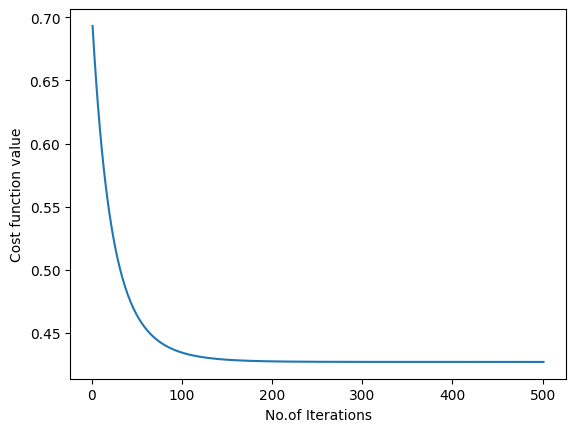

In [41]:
#Learning_rate=0.1 , No.of iterations=500
x=len(cost_vals)
idx_lst=[]
for i in range(x):
  idx_lst.append(i+1)

plt.plot(idx_lst,cost_vals)
plt.xlabel("No.of Iterations")
plt.ylabel("Cost function value")

In [43]:
pre_validate_outputs,validate_outputs=forward_prop(X_input_validation,weights_dct,bias_dct,(n_layers+1))
validation_accuracy=calc_accuracy(validate_outputs['A'+str(n_layers+1)],Y_validation)

print(validation_accuracy)

0.85375


Calculating the accuracy of the Training set

In [44]:
pre_training_outputs,training_outputs=forward_prop(X_input_training,weights_dct,bias_dct,(n_layers+1))
training_accuracy=calc_accuracy(training_outputs['A'+str(n_layers+1)],Y_training)

print(training_accuracy)

0.8475


Hence my Trained model gives an accuracy of 84.75% on the Training dataset and an accuracy of 85.375% on the Cross-Validation dataset

Now I will change the learning rate

Text(0, 0.5, 'Cost function value')

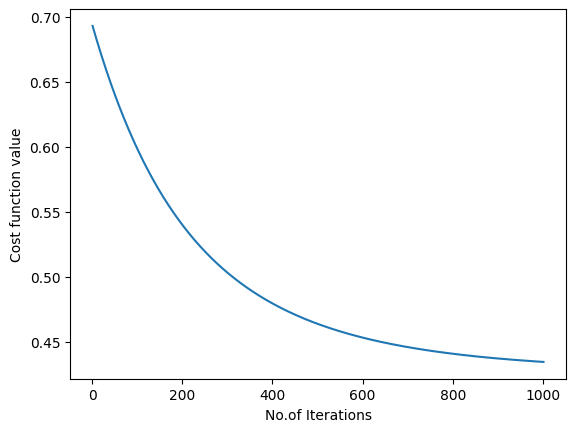

In [ ]:
#LEARNING RATE:0.01, no.of iterations while training=1000
x=len(cost_vals)
idx_lst=[]
for i in range(x):
  idx_lst.append(i+1)

plt.plot(idx_lst,cost_vals)
plt.xlabel("No.of Iterations")
plt.ylabel("Cost function value")

In [45]:
#No.of test examples=238
tes=238
X_input_test=np.zeros((10,tes))
for i in range(0,tes):
  X_input_test[0][i]=male_lst[i+t+v]
  X_input_test[1][i]=age_lst[i+t+v]
  X_input_test[2][i]=education_lst[i+t+v]
  X_input_test[3][i]=cigsPerDay_lst[i+t+v]
  X_input_test[4][i]=totChol_lst[i+t+v]
  X_input_test[5][i]=sysBP_lst[i+t+v]
  X_input_test[6][i]=diaBP_lst[i+t+v]
  X_input_test[7][i]=BMI_lst[i+t+v]
  X_input_test[8][i]=heartRate_lst[i+t+v]
  X_input_test[9][i]=glucose_lst[i+t+v]


In [46]:
Y_testing=np.zeros((1,tes))
for j in range(0,tes):
  Y_testing[0][j]=TenYearCHD_lst[j+t+v]


In [48]:
pre_test_outputs,test_outputs=forward_prop(X_input_test,weights_dct,bias_dct,(n_layers+1))
test_accuracy=calc_accuracy(test_outputs['A'+str(n_layers+1)],Y_testing)
print(test_accuracy)


0.8361344537815126


Now, I am going to plot **"Loss value"** Vs **"No.of ierations"** curves by varying the learning rate(α),for same no.of iterations.Finally I am going to put all these curves into a single plot. I have taken values of α to be 0.1(the actual learning rate I have used to train my model),α=0.01(low), α=0.9(high), α=20(very high). we can see that for high and very high α values, we do not get our desired plot(or results).

In [51]:
layer_dict={"L1":5,"L2":4,"L3":4,"L4":3,"L5":3,"L6":4} # Information(or dictionary) showing the no.of layers and no.of neurons in each layer
n_layers=6
weights_dct,bias_dct=init_weights(X_input_training,layer_dict,n_layers)
alpha=0.01 #learning rate

In [52]:
cost_vals_1=[]
for i in range(501):

  x=run_epoch(X_input_training,(n_layers+1),Y_training,weights_dct,bias_dct,alpha)
  cost_vals_1.append(x)
  if(i%10==0):
    print("After",i,"epochs, cost function value :",cost_vals_1[i])

After 0 epochs, cost function value : 0.693147181179317
After 10 epochs, cost function value : 0.6813540819626296
After 20 epochs, cost function value : 0.670136658976968
After 30 epochs, cost function value : 0.6594663628962067
After 40 epochs, cost function value : 0.649315818367135
After 50 epochs, cost function value : 0.6396588215820583
After 60 epochs, cost function value : 0.6304703301179568
After 70 epochs, cost function value : 0.6217264457704724
After 80 epochs, cost function value : 0.6134043916034604
After 90 epochs, cost function value : 0.6054824843168812
After 100 epochs, cost function value : 0.5979401029105783
After 110 epochs, cost function value : 0.5907576545078576
After 120 epochs, cost function value : 0.5839165380919243
After 130 epochs, cost function value : 0.5773991068060478
After 140 epochs, cost function value : 0.5711886293767918
After 150 epochs, cost function value : 0.5652692511325492
After 160 epochs, cost function value : 0.5596259550142587
After 170 e

In [58]:
layer_dict={"L1":5,"L2":4,"L3":4,"L4":3,"L5":3,"L6":4} # Information(or dictionary) showing the no.of layers and no.of neurons in each layer
n_layers=6
weights_dct,bias_dct=init_weights(X_input_training,layer_dict,n_layers)
alpha=0.9 #learning rate

In [59]:
#Training the model for learning rate(α)=0.9
cost_vals_2=[]
for i in range(501):

  x=run_epoch(X_input_training,(n_layers+1),Y_training,weights_dct,bias_dct,alpha)
  cost_vals_2.append(x)
  if(i%10==0):
    print("After",i,"epochs, cost function value :",cost_vals_2[i])

After 0 epochs, cost function value : 0.693147181488624
After 10 epochs, cost function value : 0.4345785544368279
After 20 epochs, cost function value : 0.4275243732782598
After 30 epochs, cost function value : 0.42706102588402267
After 40 epochs, cost function value : 0.42702449091593836
After 50 epochs, cost function value : 0.42702146855035844
After 60 epochs, cost function value : 0.42702121511467384
After 70 epochs, cost function value : 0.42702119378015646
After 80 epochs, cost function value : 0.4270211919821364
After 90 epochs, cost function value : 0.427021191830547
After 100 epochs, cost function value : 0.4270211918177696
After 110 epochs, cost function value : 0.42702119181672565
After 120 epochs, cost function value : 0.42702119181663784
After 130 epochs, cost function value : 0.4270211918166531
After 140 epochs, cost function value : 0.4270211918166067
After 150 epochs, cost function value : 0.42702119181663706
After 160 epochs, cost function value : 0.42702119181662535
A

In [64]:
layer_dict={"L1":5,"L2":4,"L3":4,"L4":3,"L5":3,"L6":4} # Information(or dictionary) showing the no.of layers and no.of neurons in each layer
n_layers=6
weights_dct,bias_dct=init_weights(X_input_training,layer_dict,n_layers)
alpha=20 #learning rate

In [65]:
#Training the model for a very high learning rate(α)=9
cost_vals_3=[]
for i in range(501):

  x=run_epoch(X_input_training,(n_layers+1),Y_training,weights_dct,bias_dct,alpha)
  cost_vals_3.append(x)
  if(i%10==0):
    print("After",i,"epochs, cost function value :",cost_vals_3[i])

After 0 epochs, cost function value : 0.6931471812626436
After 10 epochs, cost function value : 0.5712808076246578
After 20 epochs, cost function value : 0.5204365401518047
After 30 epochs, cost function value : 0.5733002883745927
After 40 epochs, cost function value : 0.5189219845650764
After 50 epochs, cost function value : 0.5739277667589446
After 60 epochs, cost function value : 0.5184870034035771
After 70 epochs, cost function value : 0.5740958905817695
After 80 epochs, cost function value : 0.5183733021167819
After 90 epochs, cost function value : 0.5741389756438512
After 100 epochs, cost function value : 0.5183443568928334
After 110 epochs, cost function value : 0.5741498874212638
After 120 epochs, cost function value : 0.5183370386727539
After 130 epochs, cost function value : 0.5741526426230277
After 140 epochs, cost function value : 0.518335191634653
After 150 epochs, cost function value : 0.5741533377746549
After 160 epochs, cost function value : 0.518334725668145
After 170 

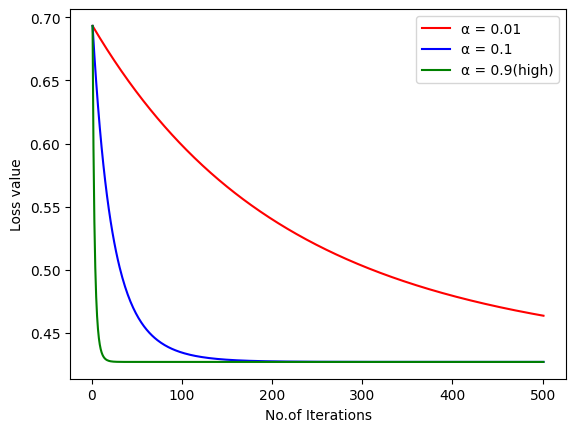

In [72]:
#Learning_rate=0.01 , No.of iterations=500
x1=len(cost_vals_1)
idx_lst_1=[]
for i in range(x1):
  idx_lst_1.append(i+1)
plt.plot(idx_lst_1,cost_vals_1,color='r',label='α = 0.01')
plt.plot(idx_lst,cost_vals,color='b',label='α = 0.1')
plt.plot(idx_lst,cost_vals_2,color='g',label='α = 0.9(high)')
#plt.plot(idx_lst,cost_vals_3,color='y',label='α = 20(very high)')

plt.xlabel("No.of Iterations")
plt.ylabel("Loss value")
plt.legend()
plt.show()

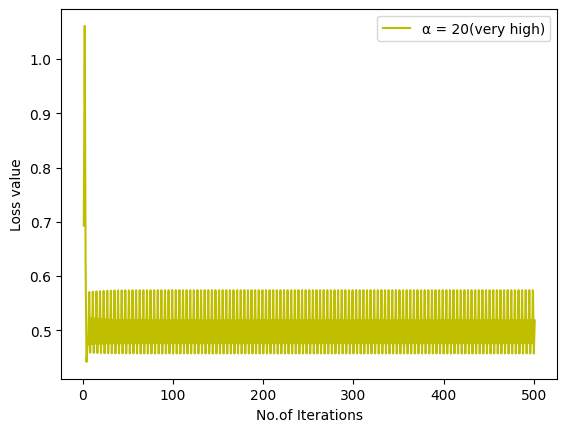

In [73]:
#Plot for a very high learning rate
plt.plot(idx_lst,cost_vals_3,color='y',label='α = 20(very high)')
plt.xlabel("No.of Iterations")
plt.ylabel("Loss value")
plt.legend()
plt.show()